In [15]:
##Starting

# all imports here
import numpy as np
import gudhi
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.animation as animation
from sklearn import datasets
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import Delaunay
import os

my_cwd= os.getcwd()
print(my_cwd)

/home/necromath/ml_projects


In [16]:
def triangulate_sphere(ax, k=30, cmap=cm.magma):
    ''' Creates a triangulation of a sphere 

    Parameters: 
        ax: matplotlib ax object to draw the triangulation
        k: determines how fine the triangulation should be
        cmap: color map for drawing

    Returns:
        list of triangles so that triangles[i, :] are the indices
        of the points making up the ith triangle
    '''

    U = np.linspace(0, 2 * np.pi, k)
    V = np.linspace(0, np.pi, k)
    [X, Y] = np.meshgrid(U, V)

    S1 = np.cos(X) * np.sin(Y)
    S2 = np.sin(X) * np.sin(Y)
    S3 = np.cos(Y)

    tri = Delaunay(np.array([X.flatten(), Y.flatten()]).T)
    
    ax.plot_trisurf(
        S1.flatten(), S2.flatten(), S3.flatten(),
        triangles=tri.simplices, cmap=cmap
    )

    return tri.simplices


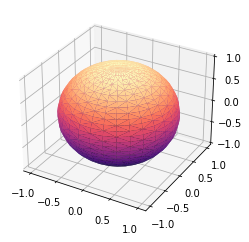

58


In [19]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
triangles = triangulate_sphere(ax, k=30)

plt.show()


# Computing the number of faces

faces = len(triangles)

# Computing the number of edges

edges = len(triangles) * 3 // 2  # Each triangle contributes 3 edges, but counted twice

#There is an error with how the points are distributed on the sphere. Everything else checks out tho.

# Computing the number of vertices

vertices = np.max(triangles)

print(vertices-edges+faces)

Euler Characteristic: (0, (0.0, inf))


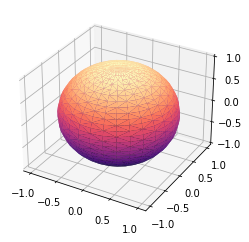

In [13]:
# TODO: Compute the Euler characteristic of the simplicial complex generated by the triangulation of the sphere
# Recall: Euler Char = V - E + F
#Psuedocode:
#Input: Lists of lists of 3, [i,j,k] such that the the indices make up the ith triangle. assume i<j<k
# Count the list of all triangles, save the value
# There are 3 edges per triangle, with some repeats! 
#For each triple, omit an element from each triple and add the 2 sets obtained
#Only count the unique edges
# There is a largest vertex value, this value is our V.
# There is a bug in this code that will cause the program to
# return a 1 instead of a 2.

from gudhi import SimplexTree

def calculate_euler_characteristic(tri):
    # Convert the Delaunay triangulation to a GUDHI simplex tree
    st = SimplexTree()
    for simplex in tri:
        st.insert(simplex.tolist())

    # Calculate the Euler characteristic
    euler_char = st.persistence(persistence_dim_max=True)[0]
    print(st)

    return euler_char

# Usage:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
triangles = triangulate_sphere(ax, k=30)  # You can adjust k as needed
euler_characteristic = calculate_euler_characteristic(triangles)
print("Euler Characteristic:", euler_characteristic)

        


In [7]:
def load_pcd(filename, show=False):
    ''' Loads 2D/3D point cloud data from *.npy files

    Parameters:
        filename: name of *.npy file.
        show: option to visualize point clouds in 3D

    Returns: 
        np.array formatted as [point_1, point_2, ..., point_n]
    
    '''
    array = np.load("~/mauasus/ml_projects/msri-day1/data/sam/msri-data/point-clouds/3D/cup.npy")
    dim = array.shape[1]
    if show:
        fig = plt.figure()
        if dim == 3:
            ax = fig.add_subplot(projection='3d')
            ax.set_xlim3d(-1, 1)
            ax.set_ylim3d(-1, 1)
            ax.set_zlim3d(-1, 1)
            ax.scatter(array[:, 0],array[:, 1], array[:, 2])
        else:
            ax = fig.add_subplot()
            ax.scatter(array[:, 0], array[:, 1])
    return array 

In [8]:
def complex_visualizer_PCD(points, complex, ax, animation=False):
    ''' Visualizes complex generated from 2D or 3D point cloud data.

    Parameters:
        points: original point cloud data
        complex: simplicial complex formatted as [simplex_1, simplex_2, .... simplex_nn]. 
        Each simplex_i is a list of indices.

    '''
    dim = points.shape[1]

    for filtered_value in complex.get_filtration():
        if filtered_value[1] == 0.0:
            continue
        indices = filtered_value[0]
        sdim = len(indices) - 1
        if sdim > 1:
            alpha=0.4
        else:
            alpha = 1.0
        splex_verts = points[indices]
        color = [(1 - 1/sdim)*0.5, (1 - 1/sdim)*0.5, (1 - 1/sdim)]
        if dim == 2:
            ax.fill(splex_verts[:, 0], splex_verts[:, 1], c=color, alpha=alpha)
        else:
            verts = splex_verts.tolist()
            ax.add_collection3d(Poly3DCollection([verts], color=color, alpha=alpha))
    if animation:
        assert dim == 2
        container = ax.get_children()
        return container
    return ax

In [9]:
def animate_2d(points, min_radius, max_radius, name='animation.gif'):
    ''' Animates Rips complex at different radii. 

    Parameters:
        points: original point cloud data
        min_radius: minimum radius
        max_radius: maximum radius
    '''
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], color=(0.0, 0.0, 0.0))
    artists = []
    for i in range(min_radius, max_radius):
        cplex = rips_gudhi(points, i)
        container = complex_visualizer_PCD(points, cplex, ax, animation=True)
        artists.append(container)
    ani = animation.ArtistAnimation(fig=fig, artists=artists, interval=100)
    ani.save(name)

In [10]:
def rips_gudhi(points, radius, max_dimension=2, show=False):
    ''' TODO: use Gudhi to create a Rips complex of some fixed radius parameter. 

    Parameters:
        points: original point cloud data
        radius: radius parameter
        max_dimension: maximum dimension of simplices in resulting complex
        show: option to visualize complex 

    Returns:
        Gudhi SimplexTree object

    '''
    raise NotImplementedError('please implement')

In [11]:
# TODO: Load each of the 2D point clouds and compute the Rips complex for each dataset at various radii
#Visualize each Rips complex you generate with `complex_visualizer_PCD`.
#Finally, create an animation of the Rips complex at different radii for at least one of the 2D point clouds using `animate_2d'
